In [6]:
from Utils.ConfigProvider import ConfigProvider
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
config = ConfigProvider.config()
%matplotlib inline
%load_ext autoreload
%autoreload 2

Enter config
Leave config
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Let’s look at the data


<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'inspected')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'reference')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'diff')

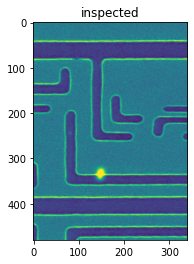

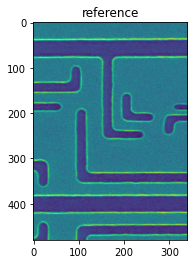

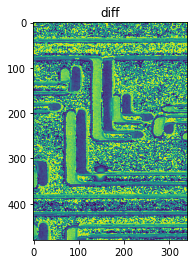

In [7]:
inspected = cv2.imread(config.data.inspected_image_path, 0)
reference = cv2.imread(config.data.reference_image_path, 0)
diff = np.abs(inspected - reference)

plt.figure()
plt.title('inspected')
plt.imshow(inspected)
plt.figure()
plt.title('reference')
plt.imshow(reference)
plt.figure()
plt.title('diff')
plt.imshow(diff)

plt.show()

Looks like noise, and some displacement (like we already knew)

fight the noise:

In [8]:
from noise_cleaning.NoiseCleaner import NoiseCleaner
noise_cleaner = NoiseCleaner()
r_blured = noise_cleaner.clean_noise(reference)
i_blured = noise_cleaner.clean_noise(inspected)

Enter config
Leave config


AttributeError: 'NoneType' object has no attribute 'median_blur_radius'

Let’s 1st fight the displacement 1st with simple feature based alignment.
(since the images are pretty close and not rotated, area based registration could be better, but less robust)



In [ ]:
from alignment.Aligner import Aligner
aligner = Aligner()
matches_image, warped, tform = aligner.align_using_feature_matching(static=r_blured, moving=i_blured)
print(f"tform: {tform}")

plt.figure()
plt.title('matches_image')
plt.imshow(matches_image)
plt.figure()
plt.title('warped')
plt.imshow(warped)

warped_diff = np.abs(warped - reference)
plt.figure()
plt.title('warped_diff')
plt.imshow(warped_diff)
